# Decision Tree

 A árvore de decisão é um modelo de aprendizado de máquina, que utiliza os conceitos de árvores, normalmente o conceito de árvore binária, como no exemplo abaixo.

<center>

![image.png](../figures/decison_tree_ex.png)

</center>

 Além de que ela será do tipo de aprendizado supervisionado, onde iremos passar suas entradas, e principalmente, as suas saídas, para que assim o nosso modelo possa associar cada característica a cada rótulo.

## Scikit-learn

Aqui iremos utilizar como base, o scikit-learn (Machine Learning in Python), uma biblioteca em Python que faz uso de ferramentas e técnicas para o aprendizado de máquina. Basicamente ela usa uma versão otimizada do algoritmo CART (Classification and Regression Trees). Classificação e regressão são de uma forma resumida, os tipos de saídas que seram retornadas.

**Árvores de decisão para classificação:** 
- A saída irá retornar um valor específico ou uma classe, como por exemplo: (Cachorro, 1, Não Spam, Doente).

**Árvores de decisão para regressão:** 
- A saída irá retornar um valor contínuo, como por exemplo: (2.34, 10, 1.9999).

## Importando as bibliotecas necessárias e lendo o dataset tratado, transformando-o em um DataFrame

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score, classification_report

In [44]:
df = pd.read_csv('dataset_tratado.csv')

df['ZSN'].value_counts()


ZSN
0    1306
1     394
Name: count, dtype: int64

## Balanceando com o algoritmo Up-sampling

In [45]:
# Separando as classes
df_majority = df[df.ZSN==0]
df_minority = df[df.ZSN==1]

# Aplicando o algoritmo Up-sampling na classe minoritária
df_minority_upsampled = resample(df_minority, replace=True, n_samples=1306, random_state=123)

# Combinando o DataFrame 
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

df_upsampled.ZSN.value_counts()

ZSN
0    1306
1    1306
Name: count, dtype: int64

## Balanceando com o algoritmo Down-sampling

In [46]:
# Separando as classes
df_majority = df[df.ZSN==0]
df_minority = df[df.ZSN==1]
 
# Aplicando o algoritmo Down-sampling na classe minoritária
df_majority_downsampled = resample(df_majority, replace=False, n_samples=394, random_state=123)
 
# Combinado o DataFrame
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
df_downsampled.ZSN.value_counts()

ZSN
0    394
1    394
Name: count, dtype: int64

## Armazenando nas variáveis nossas colunas referentes a características e rótulos do nosso DataFrame

In [47]:
X = df.iloc[:, :-1]  # Armazenando todas as colunas de características, exceto a última pois ela é a coluna de rótulo
y = df.iloc[:, -1]   # Armazenado a última coluna, que será o nosso rótulo


## Dividindo os dados em um conjunto de treino, e outro conjunto para teste

Aqui neste momento, utilizamos cerca de 20% dos dados do nosso Dataset apenas para teste, enquanto o restante dos dados serão usados apenas para treinar o modelo.

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 20% dos dados serão usados para teste, e o restante para treino


## Criando um modelo e treinando-o

In [49]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)


DecisionTreeClassifier()

O nosso modelo será do tipo de classificação, pois diferente do modelo de regressão, aqui nos buscamos um retorno basicamente sendo "sim" ou "não", 1 para positivo e 0 para negativo, referente a situação do paciente em ter uma futura insuficiência cardíaca crónica.

## Verificando se o modelo foi treinado corretamente e aplicando as métricas nele

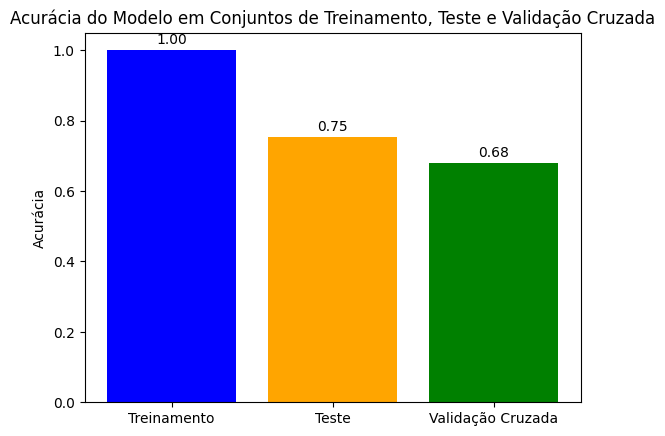

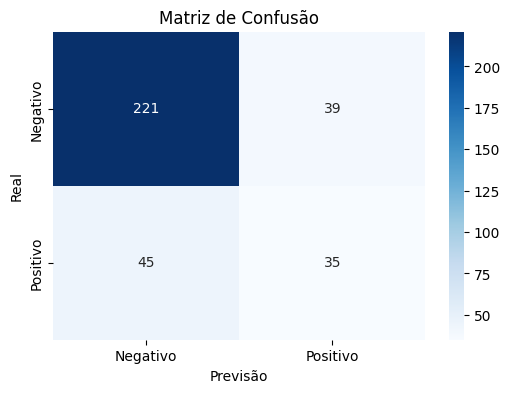

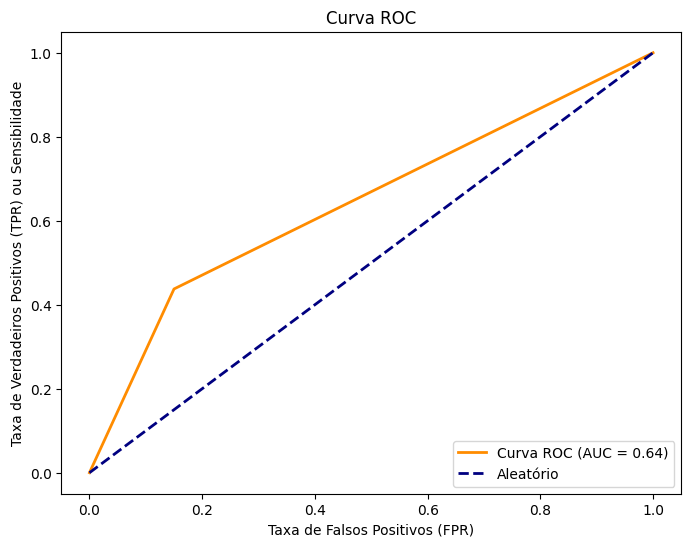

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       260
           1       0.47      0.44      0.45        80

    accuracy                           0.75       340
   macro avg       0.65      0.64      0.65       340
weighted avg       0.75      0.75      0.75       340



In [50]:
if hasattr(model, 'classes_'):
    y_test_pred = model.predict(X_test)  # Fazer previsões no conjunto de treinamento e teste
    y_train_pred = model.predict(X_train)

    accuracy_train = accuracy_score(y_train, y_train_pred)  # Calcular a acurácia do modelo em treinamento e teste
    accuracy_test = accuracy_score(y_test, y_test_pred)

    y_test_pred = model.predict(X_test)  # Fazer previsões no conjunto de treinamento e teste
    y_train_pred = model.predict(X_train)

    accuracy_train = accuracy_score(y_train, y_train_pred) # Calcular a acurácia do modelo em treinamento e teste
    accuracy_test = accuracy_score(y_test, y_test_pred)

    cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')  # Adicionar validação cruzada (5 folds)

    accuracies = [accuracy_train, accuracy_test, np.mean(cv_scores)]  # Adicionar métrica de acurácia da validação cruzada ao gráfico de barras

    labels = ['Treinamento', 'Teste', 'Validação Cruzada']  # Adicionando rótulos e valores nas barras e plotando o gráfico de barras
    for i in range(len(labels)):
        plt.text(i, accuracies[i] + 0.01, f'{accuracies[i]:.2f}', ha='center', va='bottom')
        
    plt.bar(labels, accuracies, color=['blue', 'orange', 'green'])
    plt.ylabel('Acurácia')
    plt.title('Acurácia do Modelo em Conjuntos de Treinamento, Teste e Validação Cruzada')
    plt.show()

    cm = confusion_matrix(y_test, y_test_pred) # Calcular e plotar a matriz de confusão
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negativo', 'Positivo'], yticklabels=['Negativo', 'Positivo'])
    plt.xlabel('Previsão')
    plt.ylabel('Real')
    plt.title('Matriz de Confusão')
    plt.show()

    probs = model.predict_proba(X_test)[:, 1] # Criando e plotando a Curva ROC
    fpr, tpr, thresholds = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Aleatório')
    plt.xlabel('Taxa de Falsos Positivos (FPR)')
    plt.ylabel('Taxa de Verdadeiros Positivos (TPR) ou Sensibilidade')
    plt.title('Curva ROC')
    plt.legend(loc='lower right')
    plt.show()

    print(classification_report(y_test, y_test_pred, zero_division=0)) # Calcular e imprimir as métricas

else:
    print("Erro: O modelo não foi treinado corretamente.")
